In [15]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data and Preprocess data
Load the data of train and test

In [16]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = 'test.csv' 
y_test, tx_test, ids_te = load_csv_data(DATA_TEST_PATH)

## Replace -999 with median and standardise the feature matrix

In [25]:
from data_preprocess import *
tX=replace_999_by_median(tX)
tx_test=replace_999_by_median(tx_test)
standardized_tx_train, mean_tx_train, std_tx_train = standardize(tX)
standardized_tx_test, mean_tx_test, std_tx_test = standardize(tx_test)
standardized_tx_test

array([[-0.15098524,  0.85695592, -1.41340956, ..., -0.00201861,
        -0.00375443, -0.74405712],
       [-0.26823392,  0.51511285,  0.16866785, ..., -0.00201861,
        -0.00375443, -0.26091718],
       [-0.05072359,  0.19686173,  0.37643086, ..., -0.00201861,
        -0.00375443, -0.74405712],
       ...,
       [-0.22817125, -1.1138051 , -0.39465676, ..., -0.00201861,
        -0.00375443, -0.74405712],
       [-0.45312533, -0.82649192, -0.35035672, ..., -0.00201861,
        -0.00375443, -0.4306331 ],
       [-0.53592278,  0.87164791, -0.08655773, ..., -0.00201861,
        -0.00375443, -0.74405712]])

## Split the data into train set and test set. 
Train set is used to get optimal weights and the test set will test the model accuracy.
Here the ratio is set to 0.8, which means 80% of data is used to train the model and the remaining data will be used as test set

In [18]:
from cross_validation import *
from implementations import *
x_training, x_test,y_training, y_test = split_data(standardized_tx_train, y, 0.8, seed=5)

# Least Square

In [13]:
from implementations import *
def test_least_squares(y_train, tx_train,y_test,x_test):
    print('\Testing least_squares...')
    tx_train = build_poly(tx_train, 11)
    x_test = build_poly(x_test, 11)
    w, loss = least_squares(y_train, tx_train)
    accu_train=accuracy(y_train, tx_train, w)
    accu_test=accuracy(y_test, x_test, w)
    print('The train accuracy of least square model is {accuracy}'.format(accuracy=accu_train))
    print('The test accuracy of least square model is {accuracy}'.format(accuracy=accu_test))
test_least_squares(y_training, x_training,y_test, x_test)

\Testing least_squares...
ERROR! Session/line number was not unique in database. History logging moved to new session 54
The train accuracy of least square model is 0.805025
The test accuracy of least square model is 0.80284


## Cross Validation

In [ ]:
from plots import *
def cv_least_square(y_train, tx_train,y_test, x_test, degree):
    degree = range(5,14)
    tx_train = build_poly(tx_train, degree)
    x_test = build_poly(x_test, degree)
    accu_tr = []
    accu_te = []
    for ind, lambda_ in enumerate(lambdas):
        w, loss=ridge_regression(y_train, tx_train, lambda_)
        train_acc= accuracy(y_train, tx_train, w)
        accu_tr.append(train_acc)
        test_acc= accuracy(y_test, x_test, w)
        accu_te.append(test_acc)
    cross_validation_visualization(lambdas, accu_tr, accu_te)
    
cross_validation_demo(y_training, x_training,y_test, x_test,12)

# Least Square using Gradient Desecent


In [19]:
def test_least_squares_GD(y_train, tx_train,y_test, x_test,max_iters, gamma):
    print('\Testing least_squares_GD...')
#     tx_train = build_poly(tx_train, 4)
#     x_test = build_poly(x_test, 4)
    initial_w=np.zeros(tx_train.shape[1])
    w, loss = least_square_GD(y_train, tx_train, initial_w, max_iters, gamma)
    accu_train=accuracy(y_train, tx_train, w)
    accu_test=accuracy(y_test, x_test, w)
    print('The train accuracy of least square using gradient descent model is {accuracy}'.format(accuracy=accu_train))
    print('The test accuracy of least square using gradient descent model is {accuracy}'.format(accuracy=accu_test))
test_least_squares_GD(y_training, x_training,y_test, x_test, 500, 0.001 )

\Testing least_squares_GD...
0.684925
0.68952
0.696905
0.70199
0.70484
The train accuracy of least square using gradient descent model is 0.706845
The test accuracy of least square using gradient descent model is 0.7042999999999999


# Least Square using Stochastic Gradient Desecent

In [42]:
def test_least_squares_SGD(y_train, tx_train,y_test, x_test,max_iters, gamma):
    print('\Testing least_squares_SGD...')
    batch_size = 1 
    initial_w=np.zeros(tx_train.shape[1])
    w, loss = least_square_SGD(y_train, tx_train, initial_w, batch_size, max_iters, gamma)
    accu_train=accuracy(y_train, tx_train, w)
    accu_test=accuracy(y_test, x_test, w)
    print('The train accuracy of least square using stochastic gradient descent model is {accuracy}'.format(accuracy=accu_train))
    print('The test accuracy of least square using stochastic gradient descent model is {accuracy}'.format(accuracy=accu_test))
test_least_squares_SGD(y_training, x_training,y_test, x_test, 3000, 0.001 )

\Testing least_squares_SGD...
0.5447949999999999
0.699445
0.6992700000000001
0.69566
0.710245
0.71095
The train accuracy of least square using stochastic gradient descent model is 0.71225
The test accuracy of least square using stochastic gradient descent model model is 0.71338


# Ridge Regression with Feature Augumentation
Here we add a polynomial basis to the original data

In [19]:
def test_ridge_regression_with_feature_augmentation(y_train, tx_train,y_test, x_test,degree):
    tx_train = build_poly(tx_train, degree)
    x_test = build_poly(x_test, degree)
#    for i in np.arange(0.00001,0.0001,0.00001):
    w, loss=ridge_regression(y_train, tx_train, 0.00007)
    accu_train=accuracy(y_train, tx_train, w)
    accu_test=accuracy(y_test, x_test, w)
#        print(accu_train)
    print('The train accuracy of ridge regression model is {accuracy}'.format(accuracy=accu_train))
    print('The test accuracy of ridge regression model is {accuracy}'.format(accuracy=accu_test))
    return w
w=test_ridge_regression_with_feature_augmentation(y_training, x_training,y_test, x_test,15)

The train accuracy of ridge regression model is 0.82161
The test accuracy of ridge regression model is 0.81862


In [28]:
standardized_tx_test=build_poly(tx_test,15)
#standardized_tx_test

In [29]:
OUTPUT_PATH = 'RR_156_check.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, standardized_tx_test)
create_csv_submission(ids_te, y_pred, OUTPUT_PATH)

# Logistic Regression

In [39]:
def test_logistic_regression(y_train, tx_train,y_test, x_test,max_iters, gamma):
    print('\Testing logistic_regression...')
    initial_w=np.zeros(tx_train.shape[1])
    w, loss = logistic_regression(y_train, tx_train, initial_w, max_iters, gamma)
    accu_train=accuracy(y_train, tx_train, w)
    accu_test=accuracy(y_test, x_test, w)
    print('The train accuracy of logistic_regression model is {accuracy}'.format(accuracy=accu_train))
    print('The test accuracy of logistic_regression model is {accuracy}'.format(accuracy=accu_test))
test_logistic_regression(y_training, x_training,y_test, x_test, 1000, 0.0001)

\Testing least_squares_SGD...
0.68447


C:\Users\fukan\ML\proj1\implementations.py:152: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1. + np.exp(tx_dot_w)) - y * tx_dot_w)


0.72526
0.72534
0.725365
0.725355
The train accuracy of least square using gradient descent model is 0.725345
The test accuracy of least square using gradient descent model model is 0.7264999999999999


# Regularized Logistic Regression

In [41]:
def test_reg_logistic_regression(y_train, tx_train,y_test, x_test,lambda_,max_iters, gamma):
    print('\Testing reg_least_squares_SGD...')
    initial_w=np.zeros(tx_train.shape[1])
    w, loss = reg_logistic_regression(y_train, tx_train, lambda_, initial_w, max_iters, gamma)
    accu_train=accuracy(y_train, tx_train, w)
    accu_test=accuracy(y_test, x_test, w)
    print('The train accuracy of regularized logistic_regression model is {accuracy}'.format(accuracy=accu_train))
    print('The test accuracy of regularized logistic_regression model is {accuracy}'.format(accuracy=accu_test))
test_reg_logistic_regression(y_training, x_training,y_test, x_test, 0.005, 1000, 0.001)

\Testing least_squares_SGD...
0.68447
0.7251000000000001
0.725265
0.72533
0.72533
0.72533
0.72536
0.7253499999999999
0.725365
0.7253700000000001
The train accuracy of least square using gradient descent model is 0.7253700000000001
The test accuracy of least square using gradient descent model model is 0.72646


# Cross valiadition for Selection of Best Degree of Ridge Regression with Feature Augmetation
Here we use a 10-fold cross validation.
we define the selection range of degree to be integer from 8 to 14. The lambda will be 10 numbers selected uniformally from 0.00001 to 0

In [30]:
best_degree_selection(y,standardized_tx_train,np.arange(8,16), 10, np.logspace(-5, 0, 10))

test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test


12

Once the degree has been defined, we can use plot to show the best lambda

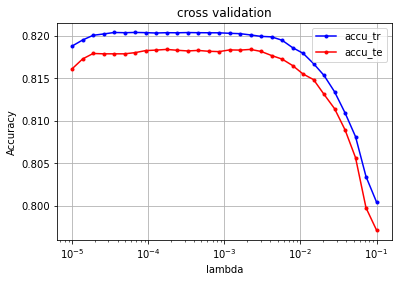

In [33]:
from cross_validation import *
def cross_validation_demo(y_train, tx_train,y_test, x_test, degree):
    lambdas = np.logspace(-5, -1, 30)
    tx_train = build_poly(tx_train, degree)
    x_test = build_poly(x_test, degree)
    accu_tr = []
    accu_te = []
    for ind, lambda_ in enumerate(lambdas):
        w, loss=ridge_regression(y_train, tx_train, lambda_)
        train_acc= accuracy(y_train, tx_train, w)
        accu_tr.append(train_acc)
        test_acc= accuracy(y_test, x_test, w)
        accu_te.append(test_acc)
    cross_validation_visualization(lambdas, accu_tr, accu_te)
    
cross_validation_demo(y_training, x_training,y_test, x_test,12)